In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


df = pd.read_csv('../base_dados/beber_amostra.csv', low_memory=False)


Acurácia: 0.63
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.64      0.63     89406
           1       0.63      0.62      0.63     89010

    accuracy                           0.63    178416
   macro avg       0.63      0.63      0.63    178416
weighted avg       0.63      0.63      0.63    178416



Acurácia e relatório de classificação salvos com sucesso.


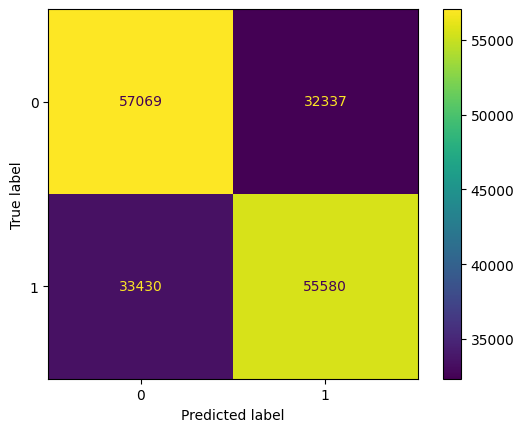

In [2]:
X = df.drop(columns=['drk_yn'])  # Atributos
y = df['drk_yn']  # Classe alvo

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print('Relatório de Classificação:\n', report)

# Matriz de confusão
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Salvar a matriz de confusão em CSV
# cm_df = pd.DataFrame(cm, index=[f'Classe {i}' for i in range(len(cm))], 
#                      columns=[f'Classe {i}' for i in range(len(cm))])
# cm_df.to_csv('../base_dados/resultados_mineracao_dados/matriz_confusao_arvore_decisao_comum.csv', index=True)


resultados = pd.DataFrame({
    'Modelo': ['Árvore de Decisão'],
    'Acurácia': [accuracy]
})

# Salvar acurácia em CSV
resultados.to_csv('../base_dados/resultados_mineracao_dados/resultado_arvore_decisao_comum.csv', index=False)

# Salvar relatório de classificação como arquivo de texto
with open('../base_dados/resultados_mineracao_dados/relatorio_classificacao_arvore_decisao_comum.txt', 'w') as f:
    f.write("Relatório de Classificação:\n")
    f.write(report)

print("Acurácia e relatório de classificação salvos com sucesso.")